# My practice for MNIST using Tensorflow

Followed [MNIST For ML Beginners](https://www.tensorflow.org/versions/r1.3/get_started/mnist/beginners)
Check current tensorflow version

In [8]:
import tensorflow as tf
print(tf.__version__)

1.3.0


## Import the data and modules first

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from matplotlib import pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
# list data files
import os
print(os.listdir('MNIST_data'))
print(os.getcwd())

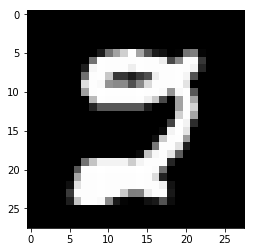

In [5]:
# how to visualize one image
fview = np.reshape(mnist.train.images[13], [28, 28])
plt.imshow(fview, cmap='Greys_r')

## Try this tutorial script
[mnist_softmax.py](https://www.github.com/tensorflow/tensorflow/blob/r1.3/tensorflow/examples/tutorials/mnist/mnist_softmax.py)

In [11]:
# copy/paste from main()
mnist = input_data.read_data_sets("MNIST_data/")

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.int64, [None])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.losses.sparse_softmax_cross_entropy on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=y)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                    y_: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0.9193
